# Lab 6: One Vs All Regularized Classifier

For multiclass classification there is two main method "One vs one classifier" and "One vs all classifier" (called also ""One vs the rest). The first method train $\frac{K\times(K-1)}{2}$ classifiers for $K$ classes and it compare all classes between each other two by two. While, "One vs All classifier" compare each class with the $K-1$ remaining class together. Thus, we train only $K$ classifier. In this session, we will use "One vs all" approach to classify handwritten digits into 10 ($K=10$) classes with labels from 0 to 9.  

## Spyder version
During this Lab, we will work with **Spyder IDE** (**I**ntegrated **D**evelopment **E**nvironment). We have 4 python file:
- Handwritting_main.py: the main function of our program that call different other module and function
- Display_digits.py: display module that helps to display digit images from the database.
- OneVsAll_Classifier.py: this module contains training and prediction functions for our multiclass classifier
- predict_your_digits.py: this module helps to test our classifier on our handmade digit images. 

<font color="blue">**Question 1: **</font> On "OneVsAll_Classifier.py" file:
- Use  [fit](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit) function of [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) sklearn class to train "logistic_regr" K classifiers with "X" and "y" input vectors.  
**Hint:** Don't forgot to define the regularization parameter C predefined in [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) class where $C=\frac{1}{\lambda}$
- Use [predict_proba](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba) function to predict probability of belonging to the corresponding classifier label.
- Use [argmax](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html) function from numpy library to predict label with max probability from the calculated probability matrix "pred_proba".


<font color="blue">**Question 2: **</font> On "Handwritting_main.py" file:
- Load data from "hand_writing.txt" file in "hand_writing" variable and check its size. (use [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) function from numpy library)  
This dataset contains 5000 of $20 \times 20$ pixel images. These images are flatten and saved on single line of 400 pixels on our dataset. Each columns of the 400 of hand_writting dataset represent pixel intensity (a feature for our classifier).
- Call "Predict_OneVsAll" function from "OneVsAll_Classifier" module to predict classes "y_pred" of our dataset 
- Calculate the "train_accuracy". What do you notice?
- Make your own digit images and call "predict" function from "predict_your_digits" module to see how well our trained classifier will behave on your handwritten digits.  
**Hint:** You could use this online tool [https://www.youidraw.com/apps/painter/](https://www.youidraw.com/apps/painter/) to draw a digit image . It is recommended to make $400\times400$ pixels image and to draw with a white pencil of size 50 on gray background.

## Jupyter version

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from skimage.transform import resize
import matplotlib.image as mpimg
from math import floor

def Display_digits(X_display,Y_display):
    """
    display digit image contained in X_display and print their labels contained in Y_display
    """
    
    # calculate number and size of patches fo each digit image
    nbr_select=X_display.shape[0] # number of digits to display
    origin_img_size=int(np.sqrt(X_display.shape[1]))
    nbr_patch_horiz=int(np.floor(np.sqrt(nbr_select)))
    nbr_patch_vertic=int(np.ceil(nbr_select/nbr_patch_horiz))
    img_width=20
    img_height=20
    
    # create Display_matrix that contains all image patches
    Display_matrix=-np.ones((nbr_patch_vertic*(img_height+1)-1,nbr_patch_horiz*(img_width+1)-1))
    for i in range(nbr_patch_vertic):
        for j in range(nbr_patch_horiz):
            if (i*nbr_patch_horiz+j>=nbr_select):
                break
            Display_matrix[i*(img_height+1):(i+1)*img_height+i,j*(img_width+1):(j+1)*img_width+j]=np.reshape(X_display[i*nbr_patch_horiz+j,np.arange(origin_img_size**2)%origin_img_size<img_height][:img_width*img_height],(img_height,img_width),order='F')
    plt.figure('dataset',figsize=(max(3,nbr_patch_horiz),max(3,nbr_patch_vertic)))
    plt.imshow(Display_matrix,cmap="gray",vmax=1,vmin=-1)
    plt.axis('off')
    plt.show()
    
    # print digit labels
    print(np.reshape(np.concatenate((Y_display[:,0].astype(int),-np.ones((nbr_patch_horiz*nbr_patch_vertic-nbr_select),dtype=int))),(nbr_patch_vertic,nbr_patch_horiz)))


def predict_your_digits(filename,Logistic_Regr_List):
    """
    Predict the written digit on the input image
    
    Args:
        filename: input image filename
        Logistic_Regr_List: list of K trained logistic classifiers
    
    Return:
        predicted label for input image
    """
    # read image file
    img=mpimg.imread(filename)
    img=np.mean(img,axis=-1)  # convert to grayscale image
    
    # resize the image
    height,width = img.shape
    height_step = floor(height/20) 
    width_step = floor(width/20) 
    if(height_step>0) and (width_step>0):
        img=img[::height_step,::width_step]
    else:
        img=resize(img,(20,20),order=1)
        
    # change the color scale from 0-255 integer to [-1,1] float
    img=(img.T/128-1)
    
    # draw the digit image
    #plt.figure('handwritten digit',figsize=(9,4))
    plt.imshow(img.T,cmap="gray",vmax=1,vmin=-1)
    plt.axis('off')
    plt.show()
    
    # predict the digit
    prediction=Predict_OneVsAll(Logistic_Regr_List,img.flatten()[np.newaxis,:])
    return prediction



<font color="blue">**Question 1: **</font>
- Use  [fit](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit) function of [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) sklearn class to train "logistic_regr" K classifiers with "X" and "y" input vectors.  
**Hint:** Don't forgot to define the regularization parameter C predefined in [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) class where $C=\frac{1}{\lambda}$
- Use [predict_proba](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba) function to predict probability of belonging to the corresponding classifier label.
- Use [argmax](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html) function from numpy library to predict label with max probability from the calculated probability matrix "pred_proba".


In [2]:

# one vs all train function
def Train_OneVsAll(X,Y,lambda_):
    """
    Train K logitic classifiers for multiclass classification with  One vs All approach
    
    Args:
        X: input digit images
        Y: labels of the digit images
        lambda_: Regularization parameter
    
    Return:
        Logistic_Regr_List: list of K logistic classifier one per class
    """
    
    K=np.unique(Y).shape[0] # number of class
    Logistic_Regr_List=[]
    for digit in range(K):
        y=(Y==digit)                                  # create binary label vector for each classifier
        y=y.astype(int)
        
        logistic_regr=LogisticRegression(C=1/lambda_) # ** your code here**    # create logistic regression classifier object
        logistic_regr.fit(X, y)                       # ** your code here**    # train logistic regression classifier object
        
        Logistic_Regr_List.append(logistic_regr)      # append the trained logistic classifier to the output list
    return Logistic_Regr_List


# one vs all predition function
def Predict_OneVsAll(classifier_list,X):
    """
    Predict the labels of input images in 'X' array using the trained K logitic classifiers 'classifier_list' 

    Return:
        y_pred: vector of predicted label for each input image
    """
    K = len(classifier_list)                # number of class
    pred_proba=np.zeros((X.shape[0],K))     # array contains m line one for each input and K columns represent the probability to
                                            # belong to the corresponding classifier label
    
    # calculate the probabilty for an input image to have as label the number of classifier 'digit' from 0 to K
    for digit in range(K):
        pred_proba[:,digit]=classifier_list[digit].predict_proba(X)[:,1]  # ** your code here**   
        
    y_pred=np.argmax(pred_proba,axis=1)  # ** your code here**   
    return y_pred



  
  
  
  
<font color="blue">**Question 2: **</font> 
- Load data from "hand_writing.txt" file in "hand_writing" variable and check its size. (use [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) function from numpy library)  
This dataset contains 5000 of $20 \times 20$ pixel images. These images are flatten and saved on single line of 400 pixels on our dataset. Each columns of the 400 of hand_writting dataset represent pixel intensity (a feature for our classifier).
- Call "Predict_OneVsAll" function to predict classes "y_pred" of our dataset 
- Calculate the "train_accuracy". What do you notice?
- Make your own digit images and call "predict" function from "predict_your_digits" module to see how well our trained classifier will behave on your handwritten digits.  
**Hint:** You could use this online tool [https://www.youidraw.com/apps/painter/](https://www.youidraw.com/apps/painter/) to draw a digit image . It is recommended to make $400\times400$ pixels image and to draw with a white pencil of size 50 on gray background.

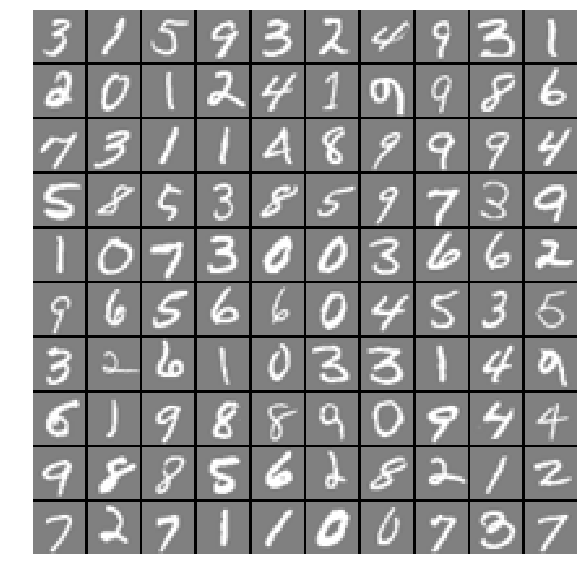

[[3 1 5 9 3 2 4 9 3 1]
 [2 0 1 2 4 1 9 9 8 6]
 [7 3 1 1 4 8 9 9 9 4]
 [5 8 5 3 8 5 9 7 3 9]
 [1 0 7 3 0 0 3 6 6 2]
 [9 6 5 6 6 0 4 5 3 5]
 [3 2 6 1 0 3 3 1 4 9]
 [6 1 9 8 8 9 0 9 4 4]
 [9 8 8 5 6 2 8 2 1 2]
 [7 2 7 1 1 0 0 7 3 7]]


/home/sbenamor/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train accuracy=  96.5 %


In [3]:
# load data
hand_writing = np.loadtxt('hand_writing.txt') 

# extract columns
m = hand_writing.shape[0] # number of samples/images in hand_writing dataset
X=hand_writing[:,:-1]
Y=hand_writing[:,-1,np.newaxis]
n=X.shape[1]  # number of features (number of pixel per image)
nbr_class=np.unique(Y).shape[0]  # number of classes K

# visualize some digits from hand_writing dataset
nbr_select=100
rand_perm=np.random.permutation(m)
X_display=X[rand_perm[:nbr_select],:]
Display_digits(X_display,Y[rand_perm[:nbr_select],:])

# train K logistic classifiers
lambda_ = .1 # reguralization parameter
Logistic_Regr_List = Train_OneVsAll(X,Y,lambda_)

#predict class on training dataset
y_pred = Predict_OneVsAll(Logistic_Regr_List,X)# ** your code here**   

# calculate train accuracy
train_accuracy = np.sum(Y==y_pred[:,np.newaxis])/m*100 # ** your code here** 
print("train accuracy= ",train_accuracy ,"%")

# test our multiclass classifier
for c in range(0):
    predict_digit=predict_your_digits("test_digit"+str(c)+".jpg",Logistic_Regr_List)
    print("the digit in the image is",c," our One Vs All classifier predict",predict_digit)


<font color="green">**Notes: **</font> 

As we see the train accuracy is high (around 96%) but this didn't mean that our algorithm has high performance. In fact if we test in on new data for example created by ourself we will note that our algorithm won't perform that well and predict correctly new handwritten digits. Hence, our algorithm encounter the overfitting problem since it has big number of features (around 400) and not enough training data. The rule of thumbs is to have about 50 samples for each feature (that make a total of 20000 sample but we have only 5000 images).

In the other hand the problem of handwritten recognition is complex problem and simple model like logistic classifier couldn't perform well. In order to get high performance we may use more complex model like neural network that will create more significant features among its different layers instead of using directly pixel values as features.